In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
colors=["#89CFF0","#FF69B4","#FFD700","#7B68EE","#FF4500",
        "#9370DB","#32CD32","#8A2BE2","#FF6347","#20B2AA",
        "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]
df=pd.read_csv("/Shop.csv")
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
1137,1138,46,Male,Shirt,Clothing,91,New Mexico,XL,Pink,Winter,2.8,No,Credit Card,2-Day Shipping,Yes,Yes,16,Bank Transfer,Every 3 Months
2203,2204,53,Male,Dress,Clothing,79,Rhode Island,M,Indigo,Winter,3.1,No,Venmo,Free Shipping,No,No,32,Cash,Quarterly
1321,1322,59,Male,T-shirt,Clothing,84,Missouri,L,Orange,Winter,3.7,No,Credit Card,Express,Yes,Yes,45,Bank Transfer,Every 3 Months
1022,1023,61,Male,Handbag,Accessories,41,Nebraska,M,Lavender,Winter,4.9,Yes,Cash,Store Pickup,Yes,Yes,7,Cash,Annually
759,760,51,Male,Dress,Clothing,49,Rhode Island,XL,Green,Winter,2.6,Yes,Bank Transfer,Next Day Air,Yes,Yes,25,Credit Card,Fortnightly


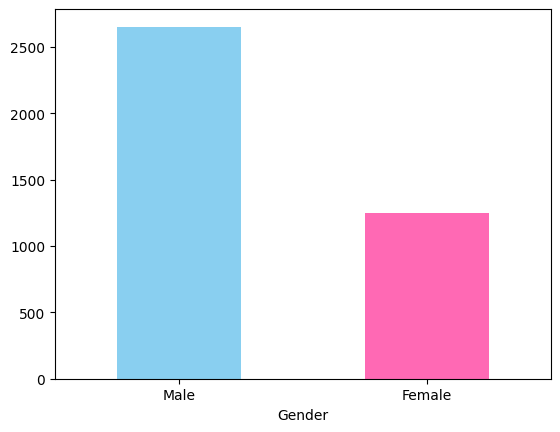

In [ ]:
ax=df['Gender'].value_counts().plot(kind='bar',rot=0,color=colors)
plt.show()

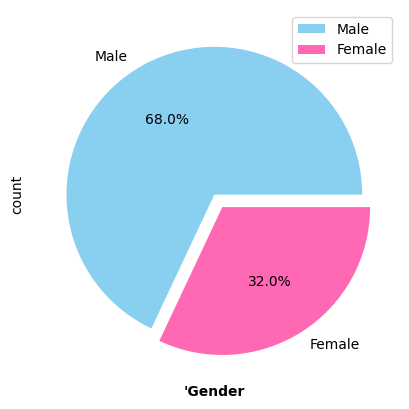

In [ ]:
counts=df["Gender"].value_counts()
counts.plot(kind="pie",colors=colors,explode=(0,0.1),autopct="%1.1f%%")
plt.xlabel("'Gender",weight="bold")
plt.legend()
plt.show()

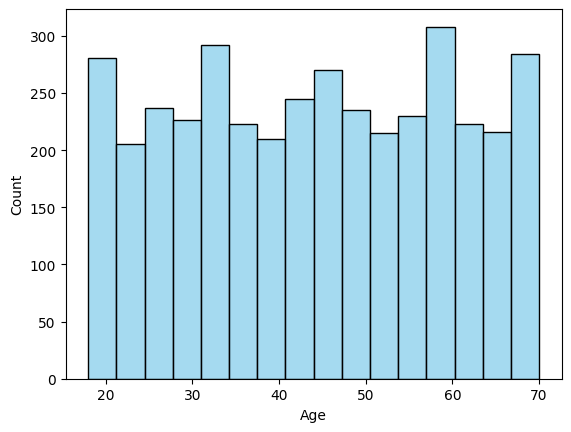

In [ ]:
sns.histplot(data=df["Age"],color='skyblue')
plt.show()

In [ ]:
df["Category"].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


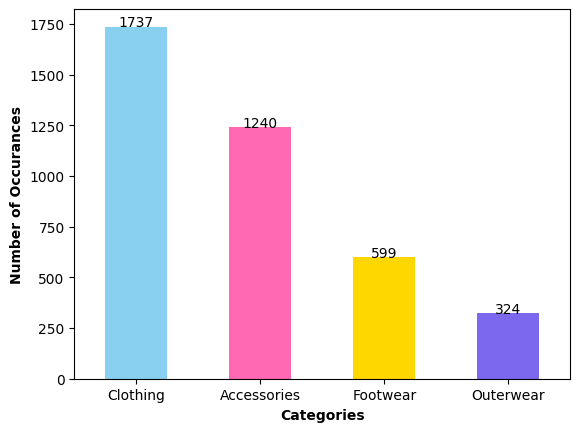

In [ ]:
ax=df['Category'].value_counts().plot(kind='bar',color=colors,rot=0)
for p in ax.patches:
  ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),ha='center')
plt.xlabel("Categories",weight="bold")
plt.ylabel("Number of Occurances",weight="bold")
plt.show()

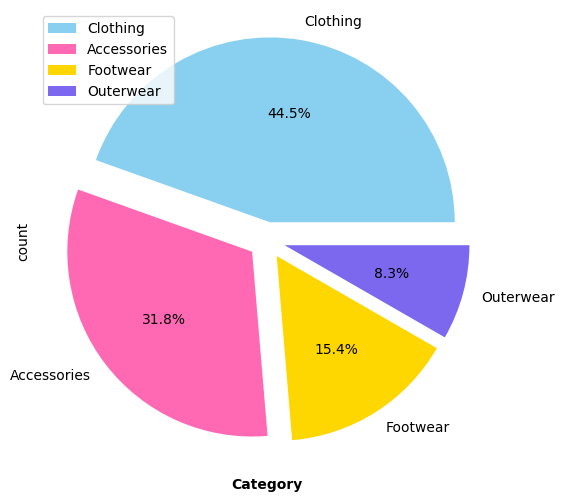

In [ ]:
plt.figure(figsize=(20,6))
counts=df["Category"].value_counts()
explode=[0.1]*len(counts)
counts.plot(kind="pie",colors=colors,explode=explode,autopct="%1.1f%%")
plt.xlabel("Category",weight="bold")
plt.legend()
plt.show()


In [ ]:
def get_pieChart(column):
  plt.figure(figsize=(20,6))
  counts=df[column].value_counts()
  explode=[0]*(len(counts)-1)+[0.1]
  counts.plot(kind="pie",colors=colors,explode=explode,autopct="%1.1f%%")
  plt.xlabel(column,weight="bold")
  plt.legend()
  plt.show()


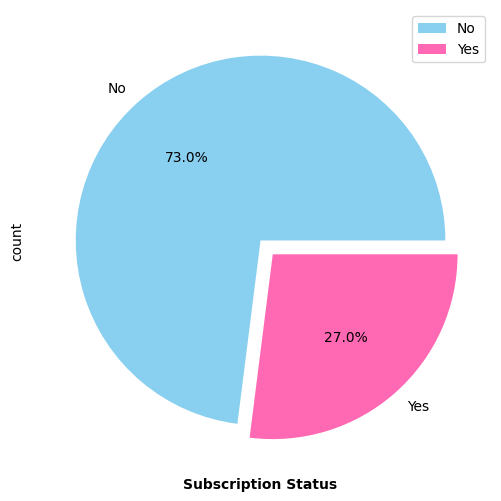

In [ ]:
get_pieChart("Subscription Status")

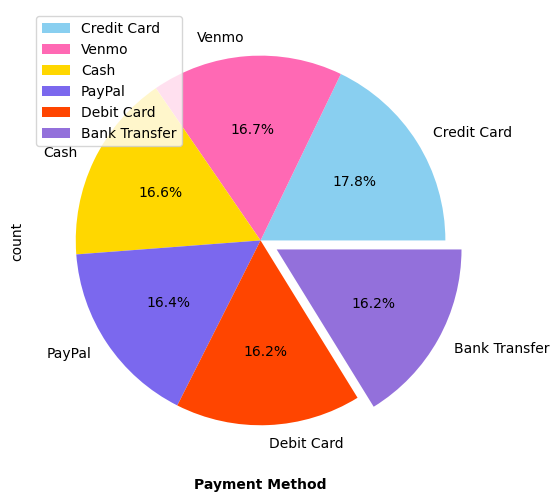

In [ ]:
get_pieChart("Payment Method")

In [ ]:
def getBarChart(column):
  plt.figure(figsize=(20,6))
  ax=df[column].value_counts().plot(kind='bar',color=colors,rot=0)
  for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),ha='center')
  plt.xlabel(column,weight="bold")
  plt.ylabel("Number of Occurances",weight="bold")
  plt.show()

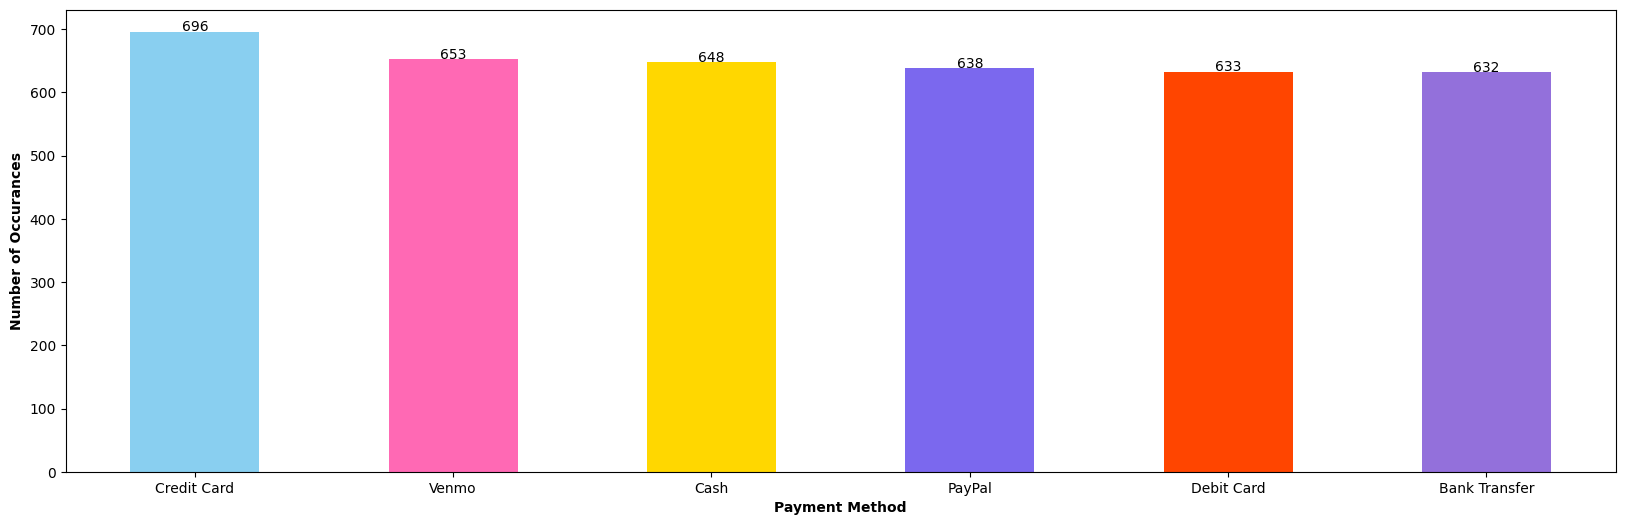

In [ ]:
getBarChart("Payment Method")

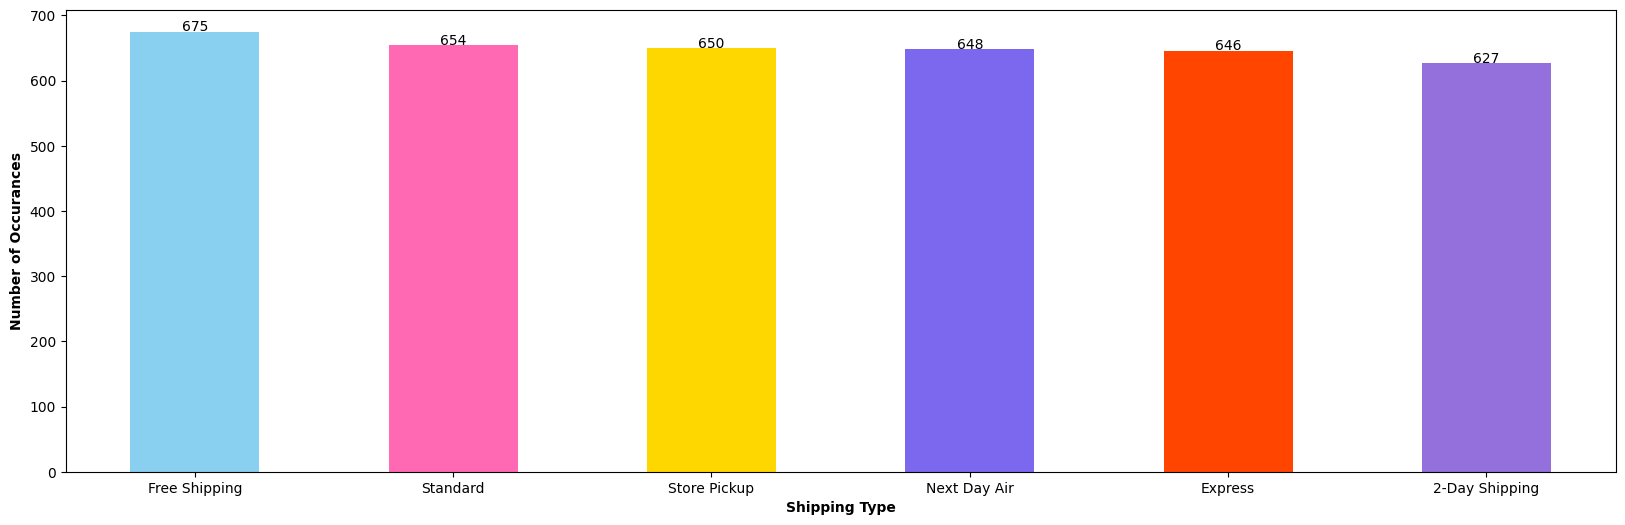

In [ ]:
getBarChart("Shipping Type")

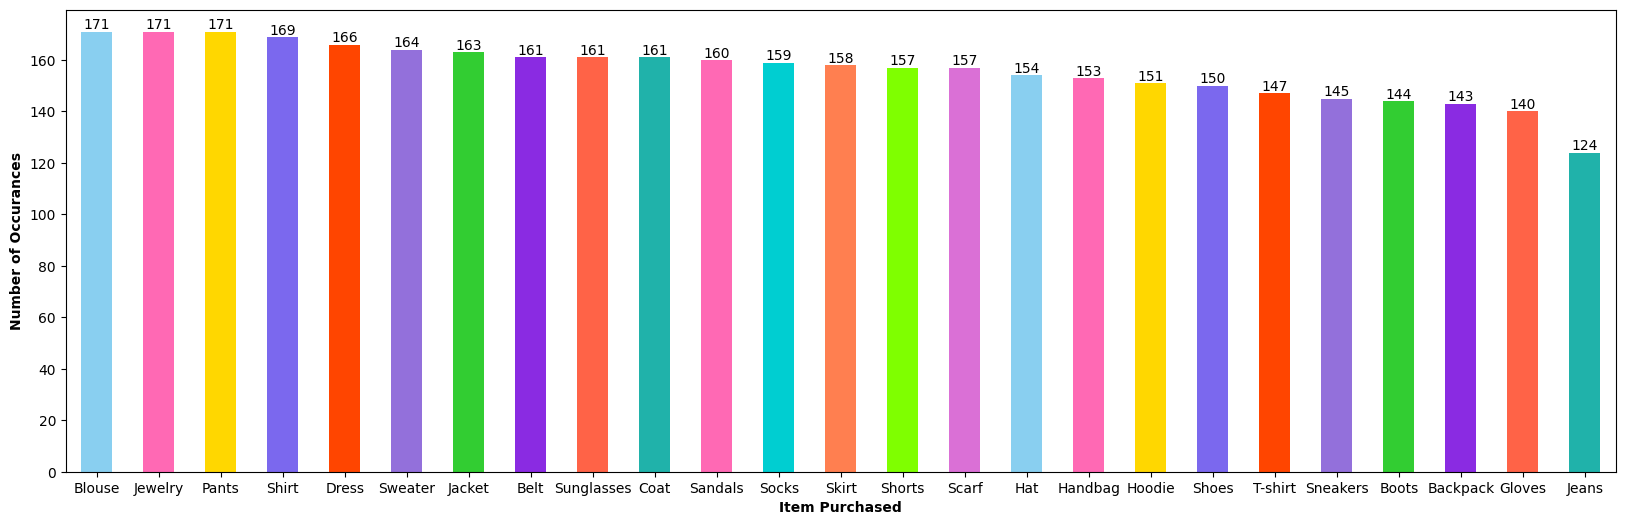

In [ ]:
getBarChart("Item Purchased")

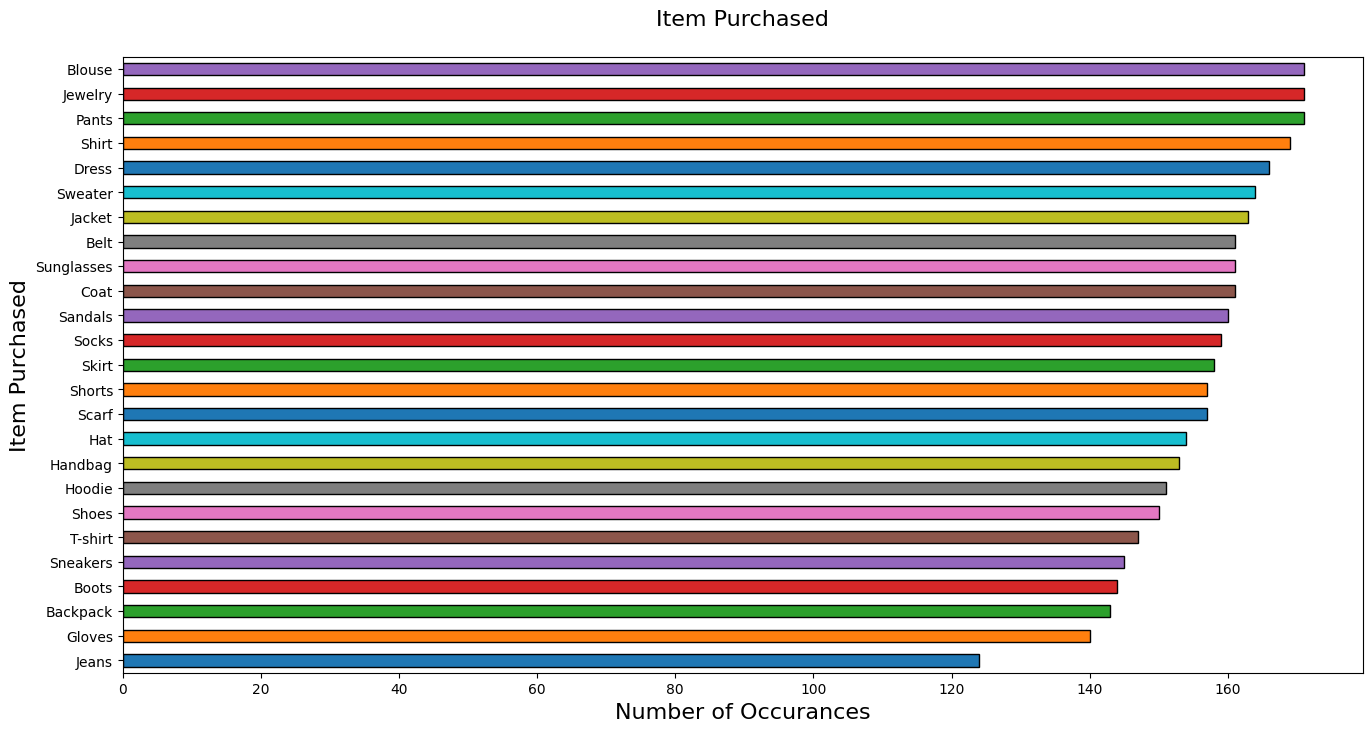

In [ ]:
plt.figure(figsize=(16,8))
df["Item Purchased"].value_counts().sort_values().plot(kind="barh",color=sns.color_palette("tab10"),edgecolor='black')
plt.ylabel("Item Purchased",fontsize=16)
plt.xlabel("Number of Occurances",fontsize=16)
plt.title("Item Purchased\n",fontsize=16)
plt.show()

In [ ]:
df["Location"].value_counts()

,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
Nebraska,87
New York,87
Nevada,87


In [ ]:
df["Size"].value_counts()

,count
Size,
M,1755
L,1053
S,663
XL,429


In [ ]:
df['Category'].value_counts()
df["Color"].value_counts()
df["Season"].value_counts()

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


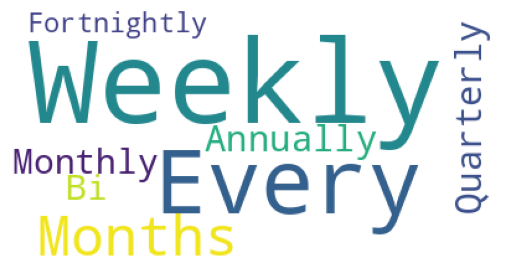

In [ ]:
text=" ".join(title for title in df["Frequency of Purchases"])
word_cloud=WordCloud(collocations=False,background_color='white').generate(text)
plt.axis("off")
plt.imshow(word_cloud)
plt.show()

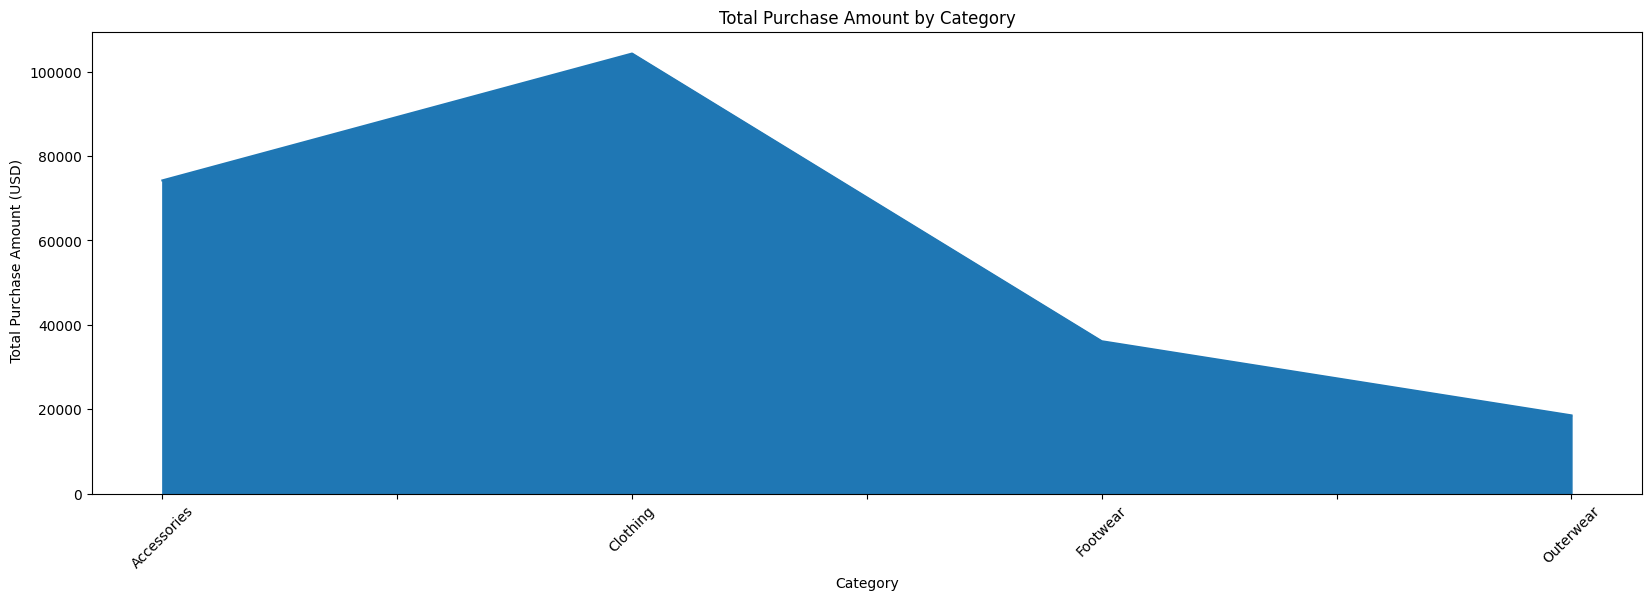

In [ ]:
plt.figure(figsize=(20,6))
category_purchase_total=df.groupby('Category')['Purchase Amount (USD)'].sum()
category_purchase_total.plot(kind='area')
plt.title("Total Purchase Amount by Category")
plt.xlabel("Category")
plt.ylabel(" Total Purchase Amount (USD)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
average_age=df["Age"].mean()
print("Average Age:",average_age)

Average Age: 44.06846153846154


In [ ]:
df["Item Purchased"].mode()
df["Item Purchased"].mode()[0]

'Blouse'

In [ ]:
df[df['Gender']=="Male"]["Item Purchased"].mode()

,Item Purchased
0,Pants


In [ ]:
df[df["Gender"]=="Female"]["Item Purchased"].mode()

,Item Purchased
0,Blouse


In [ ]:
most_common_season=df["Season"].mode()[0]
print(" Most Common Season for Purchases:",most_common_season)

 Most Common Season for Purchases: Spring


In [ ]:
max_review_rating=df["Review Rating"].max()
min_review_rating=df["Review Rating"].min()
print("Maximum Review Rating:",max_review_rating)
print("Minimum Review Rating:",min_review_rating)

Maximum Review Rating: 5.0
Minimum Review Rating: 2.5


In [ ]:
average_ratind_male=df[df["Gender"]=="Male"]["Review Rating"].mean()
average_ratind_female=df[df["Gender"]=="Female"]["Review Rating"].mean()
print("Average Review Rating for Male Customers:",average_ratind_male)
print("Average Review Rating for Female Customers:",average_ratind_female)

Average Review Rating for Male Customers: 3.7539592760180995
Average Review Rating for Female Customers: 3.741426282051282


In [ ]:
common_category_low_rating_male_winter=df[(df["Gender"]=="Male")
                                            &(df["Season"]=="Winter")
                                            &(df["Review Rating"]<3)]["Category"].mode()[0]
print("Most Common Category for Low-Rating Male Customers in Winter Season:",common_category_low_rating_male_winter)


Most Common Category for Low-Rating Male Customers in Winter Season: Clothing


In [ ]:
subscription_promo_count=df[(df["Subscription Status"]=="Yes")
                              &(df["Promo Code Used"]=="Yes")]["Customer ID"].count()
print("Number of Customers with Subscription and Promo Code USed:",subscription_promo_count)

Number of Customers with Subscription and Promo Code USed: 1053


<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  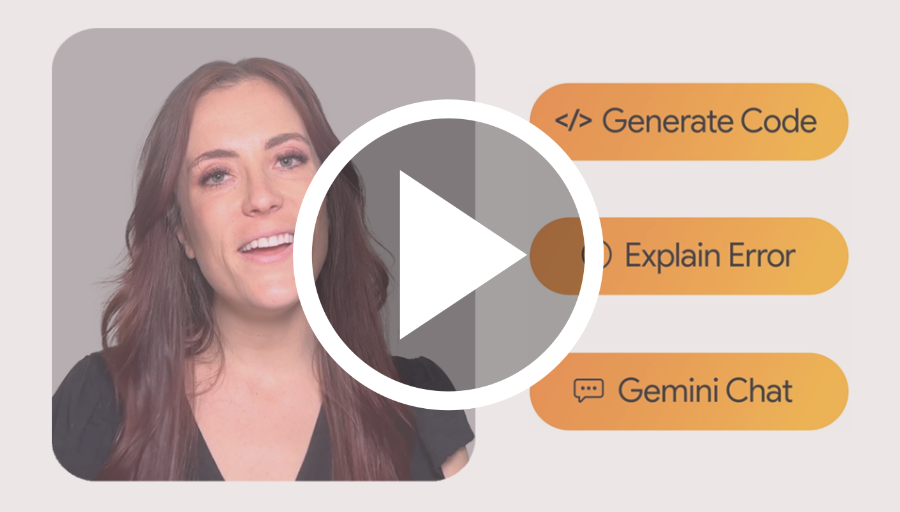
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

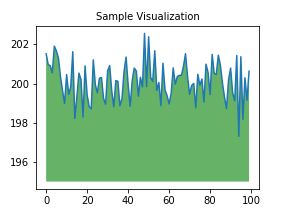

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
